Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VLfK-kmLf5On8ZIOZARkpXd_ujfV3wd8e5UIa8L6F8yo',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-9mongktqiklplz'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


ModuleNotFoundError: No module named 'ibm_boto3'

In [ ]:
data.head(10)

In [ ]:
data.tail(10)

In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
data.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [8]:
data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
data.isnull()

Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
0         False      False        False              False  False  False   
1         False      False        False              False  False  False   
2         False      False        False              False  False  False   
3         False      False        False              False  False  False   
4         False      False        False              False  False  False   
..          ...        ...          ...                ...    ...    ...   
395       False      False        False              False  False  False   
396       False      False        False              False  False  False   
397       False      False        False              False  False  False   
398       False      False        False              False  False  False   
399       False      False        False              False  False  False   

      CGPA  Research  Chance of Admit   
0    False     False             False  
1    False     False             False  
2    False     False             False  
3    False     False             False  
4    False     False             False  
..     ...       ...               ...  
395  False     False             False  
396  False     False             False  
397  False     False             False  
398  False     False             False  
399  False     False             False  

[400 rows x 9 columns]

In [11]:
data.notnull()

Serial No.  GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  \
0          True       True         True               True  True  True  True   
1          True       True         True               True  True  True  True   
2          True       True         True               True  True  True  True   
3          True       True         True               True  True  True  True   
4          True       True         True               True  True  True  True   
..          ...        ...          ...                ...   ...   ...   ...   
395        True       True         True               True  True  True  True   
396        True       True         True               True  True  True  True   
397        True       True         True               True  True  True  True   
398        True       True         True               True  True  True  True   
399        True       True         True               True  True  True  True   

     Research  Chance of Admit   
0        True              True  
1        True              True  
2        True              True  
3        True              True  
4        True              True  
..        ...               ...  
395      True              True  
396      True              True  
397      True              True  
398      True              True  
399      True              True  

[400 rows x 9 columns]

In [12]:
data.sum()

Serial No.            80200.00
GRE Score            126723.00
TOEFL Score           42964.00
University Rating      1235.00
SOP                    1360.00
LOR                    1381.00
CGPA                   3439.57
Research                219.00
Chance of Admit         289.74
dtype: float64

In [13]:
data.isna().sum() 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

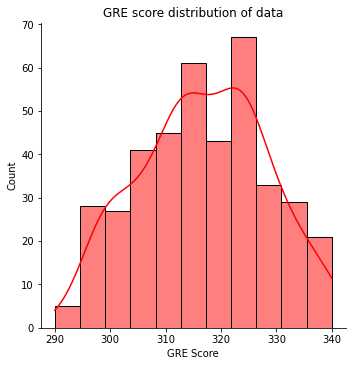

In [14]:
sns.displot(x=data["GRE Score"], kde=True, color='Red')
plt.title("GRE score distribution of data");

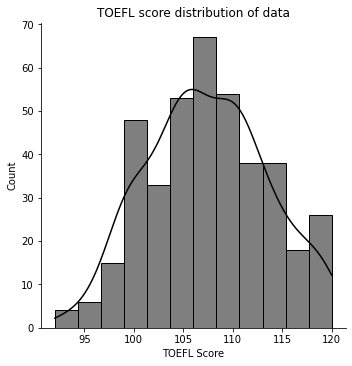

In [15]:
sns.displot(x=data["TOEFL Score"], kde=True, color='Black')
plt.title("TOEFL score distribution of data");

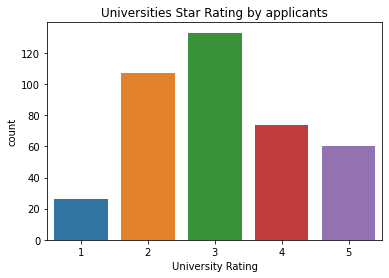

In [16]:
sns.countplot(x=data["University Rating"]);
plt.title("Universities Star Rating by applicants");

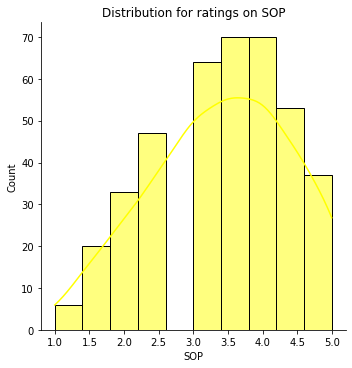

In [17]:
sns.displot(x=data["SOP"], kde=True, color='yellow');
plt.title("Distribution for ratings on SOP");

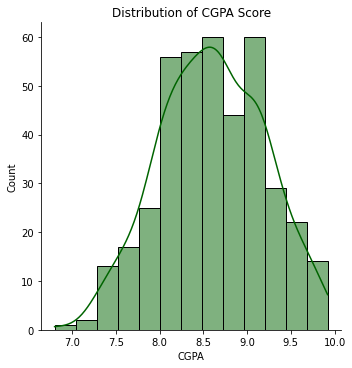

In [18]:
sns.displot(x=data["CGPA"], kde=True, color='Darkgreen');
plt.title("Distribution of CGPA Score");

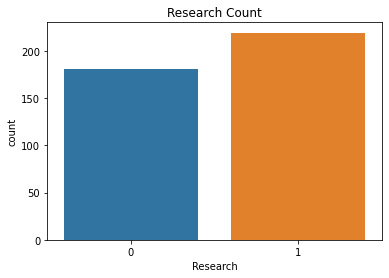

In [19]:
sns.countplot(x=data["Research"]);
plt.title("Research Count");

In [20]:
cols = data.columns
features = [i for i in data.columns if i != 'Chance of Admit']
label = 'Chance of Admit'
features

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

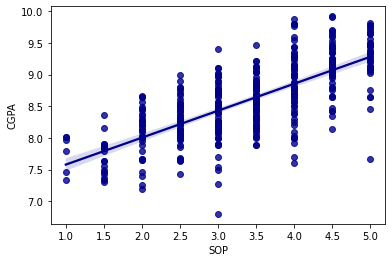

In [21]:
sns.regplot(data['SOP'],data['CGPA'],color='Darkblue')

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

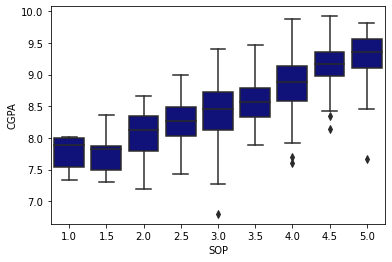

In [22]:
sns.boxplot(data['SOP'],data['CGPA'],color='Darkblue')

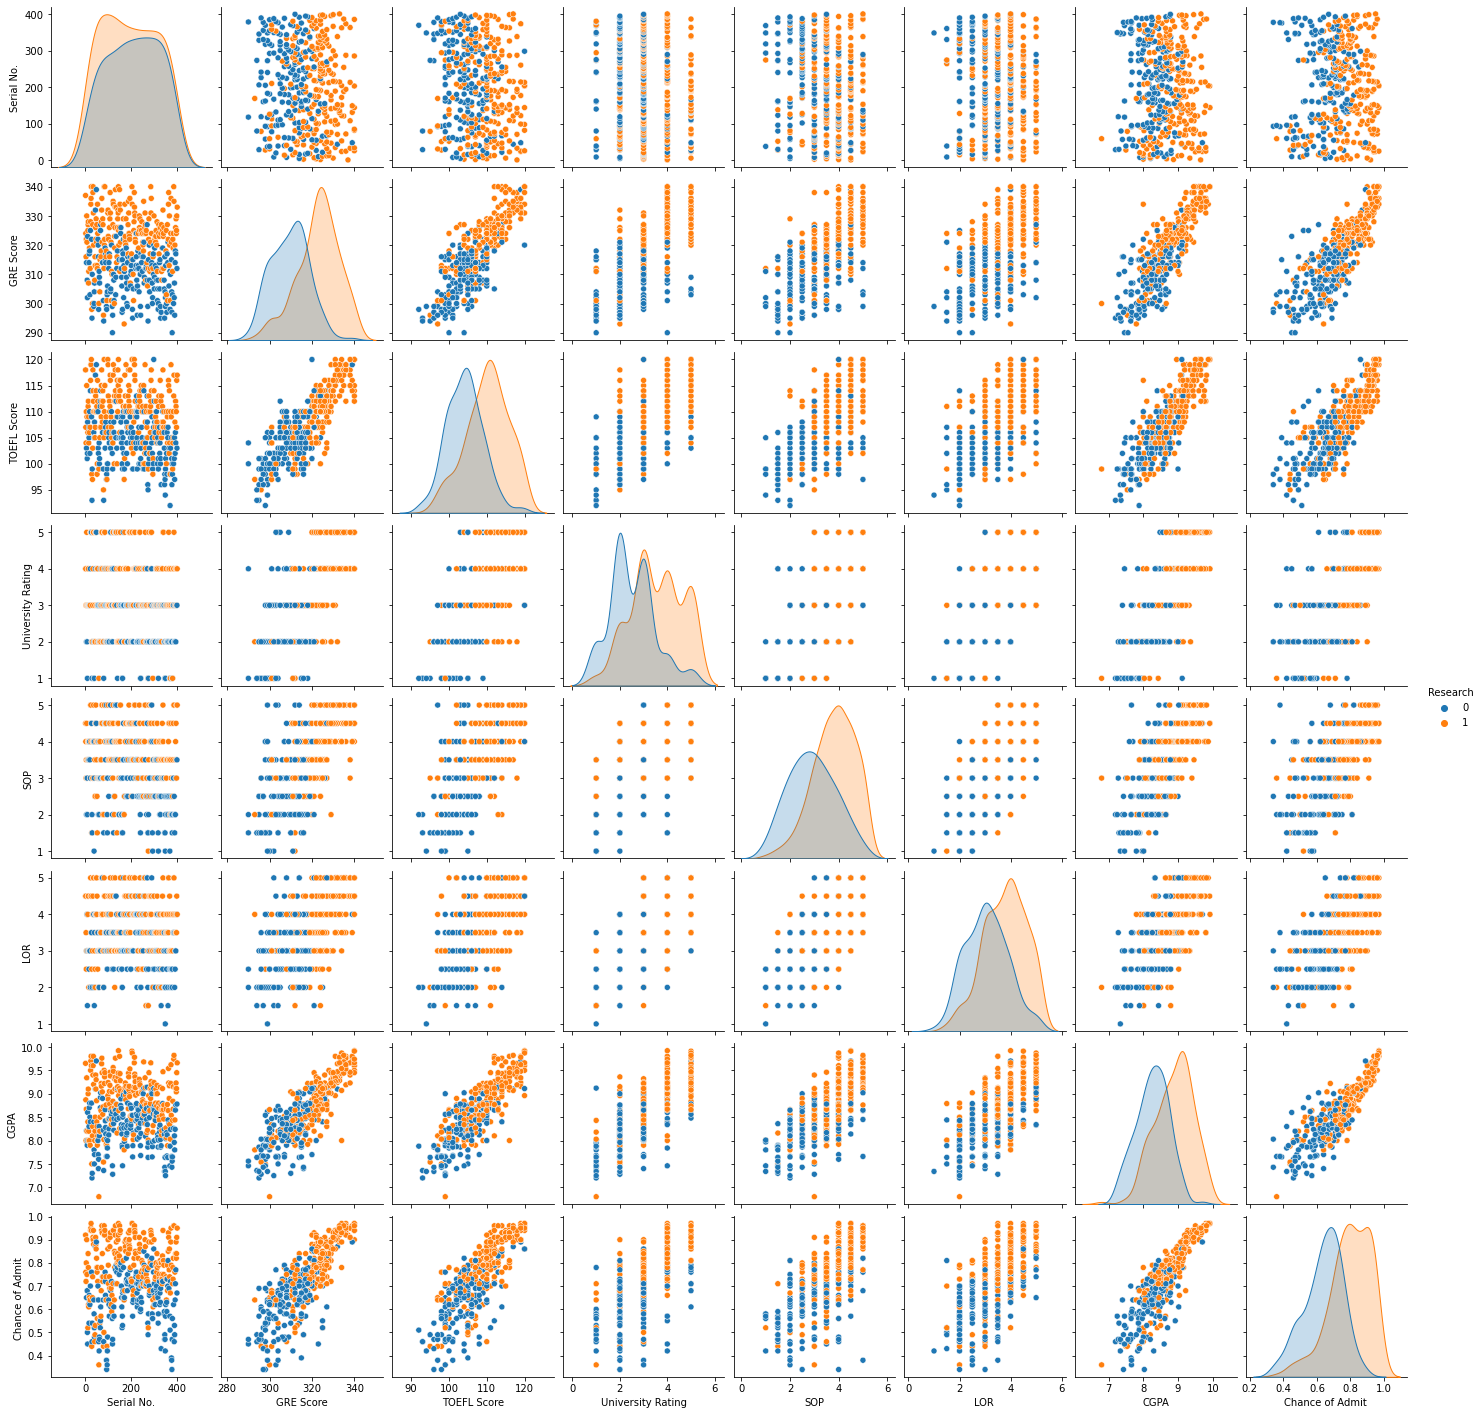

In [23]:
sns.pairplot(data,hue='Research')

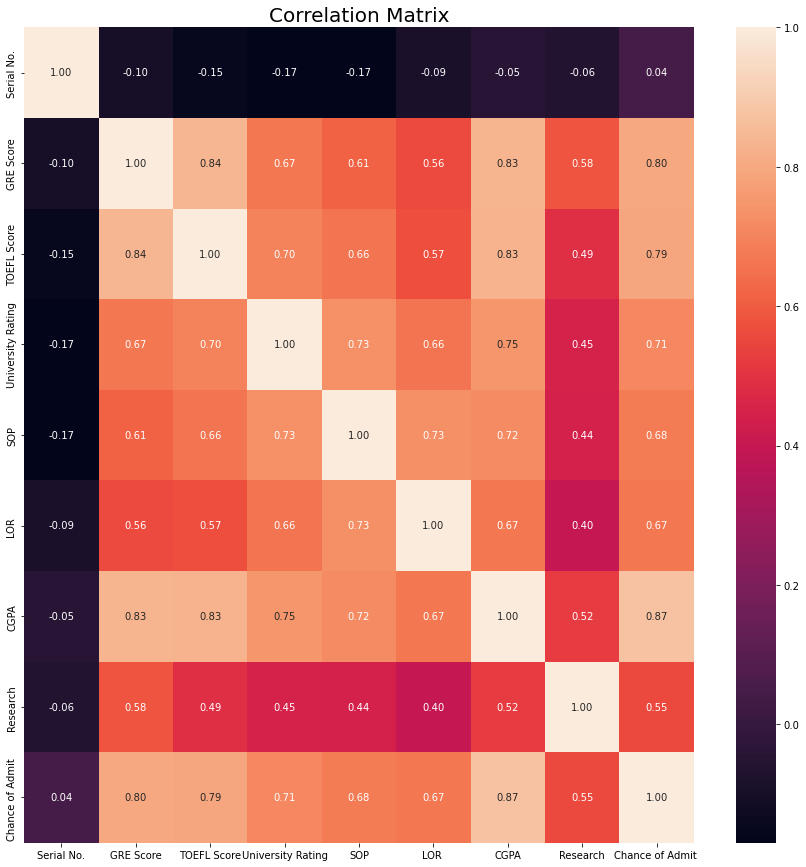

In [24]:
corr_matrix = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

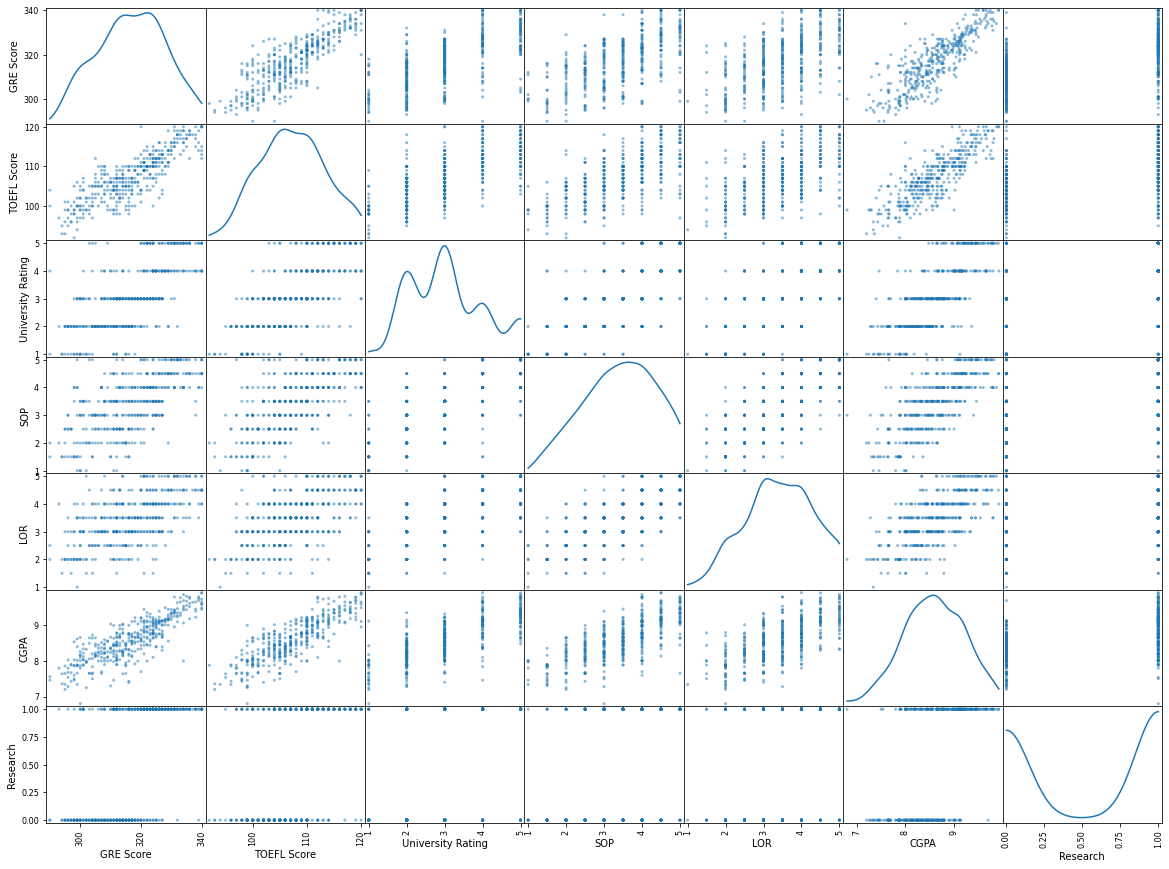

In [25]:
pd.plotting.scatter_matrix(data.loc[:,"GRE Score":"Research"],diagonal="kde",figsize=(20,15))
plt.show

In [26]:
x = data.iloc[:,1:8]
y = data.iloc[:,8:9 ]

In [29]:
x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]

In [30]:
y

Chance of Admit 
0                0.92
1                0.76
2                0.72
3                0.80
4                0.65
..                ...
395              0.82
396              0.84
397              0.91
398              0.67
399              0.95

[400 rows x 1 columns]

In [31]:
x.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

In [32]:
y.head()

Chance of Admit 
0              0.92
1              0.76
2              0.72
3              0.80
4              0.65

In [33]:
print(f'x contains: {x.shape[0]} rows and {x.shape[1]} columns')

x contains: 400 rows and 7 columns


In [34]:
print(f'y contains: {y.shape}')

y contains: (400, 1)


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [36]:
x.head()

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  Research
0       0.94     0.928571               0.75  0.875  0.875  0.913462       1.0
1       0.68     0.535714               0.75  0.750  0.875  0.663462       1.0
2       0.52     0.428571               0.50  0.500  0.625  0.384615       1.0
3       0.64     0.642857               0.50  0.625  0.375  0.599359       1.0
4       0.48     0.392857               0.25  0.250  0.500  0.451923       0.0

In [37]:
X=data.drop(['Chance of Admit '],axis=1) #input data_set
y=data['Chance of Admit '] #output labels

In [38]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [39]:
x_train

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
346       0.28     0.178571               0.25  0.125  0.250  0.269231   
297       0.60     1.000000               0.50  0.750  0.875  0.740385   
320       0.54     0.500000               0.50  0.750  0.625  0.544872   
372       0.92     0.964286               0.75  0.875  0.750  0.903846   
393       0.54     0.428571               0.25  0.500  0.500  0.628205   
..         ...          ...                ...    ...    ...       ...   
147       0.72     0.785714               0.50  0.500  0.500  0.740385   
259       0.82     0.964286               0.75  1.000  0.875  0.814103   
168       0.06     0.178571               0.25  0.250  0.750  0.320513   
40        0.36     0.642857               0.50  0.625  0.500  0.384615   
283       0.62     0.678571               0.50  0.375  0.500  0.673077   

     Research  
346       0.0  
297       0.0  
320       1.0  
372       1.0  
393       0.0  
..        ...  
147       1.0  
259       1.0  
168       1.0  
40        1.0  
283       1.0  

[340 rows x 7 columns]

In [40]:
y_train

346    0.47
297    0.86
320    0.75
372    0.95
393    0.77
       ... 
147    0.83
259    0.90
168    0.64
40     0.46
283    0.80
Name: Chance of Admit , Length: 340, dtype: float64

In [41]:
x_test

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
330       0.74     0.750000               0.50  0.625  0.500  0.596154   
317       0.20     0.250000               0.00  0.000  0.375  0.387821   
240       0.12     0.321429               0.00  0.375  0.500  0.282051   
133       0.66     0.714286               1.00  0.750  0.875  0.634615   
184       0.52     0.500000               0.25  0.375  0.750  0.487179   
152       0.62     0.714286               1.00  1.000  1.000  0.724359   
33        1.00     0.785714               1.00  0.750  0.750  0.897436   
377       0.00     0.285714               0.00  0.125  0.250  0.243590   
71        0.92     0.714286               1.00  1.000  1.000  0.948718   
4         0.48     0.392857               0.25  0.250  0.500  0.451923   
56        0.52     0.357143               0.50  0.250  0.500  0.192308   
309       0.36     0.642857               0.75  0.625  0.500  0.576923   
368       0.16     0.000000               0.00  0.250  0.250  0.346154   
231       0.58     0.500000               0.50  0.625  0.375  0.490385   
158       0.32     0.500000               0.25  0.250  0.375  0.429487   
128       0.72     0.714286               0.50  0.625  0.500  0.737179   
384       1.00     0.750000               0.75  1.000  1.000  0.942308   
69        0.76     0.821429               0.75  0.875  0.750  0.756410   
210       0.70     0.571429               0.75  0.875  0.750  0.724359   
241       0.54     0.392857               0.25  0.375  0.250  0.432692   
1         0.68     0.535714               0.75  0.750  0.875  0.663462   
44        0.72     0.750000               1.00  0.875  0.750  0.833333   
61        0.34     0.321429               0.50  0.750  0.500  0.448718   
176       0.78     0.964286               0.75  0.875  0.875  0.756410   
190       0.68     0.678571               1.00  0.875  0.750  0.756410   
341       0.72     0.642857               0.50  0.625  0.625  0.628205   
337       0.84     0.928571               1.00  1.000  1.000  0.855769   
42        0.46     0.535714               0.25  0.375  0.250  0.544872   
356       0.74     0.607143               0.50  0.625  0.750  0.631410   
161       0.16     0.250000               0.00  0.125  0.500  0.211538   
106       0.78     0.678571               0.75  0.875  0.875  0.762821   
298       0.80     0.785714               0.50  0.875  0.875  0.782051   
23        0.88     0.964286               1.00  1.000  0.875  0.929487   
74        0.48     0.500000               0.50  0.500  1.000  0.673077   
65        0.70     0.714286               0.75  0.625  0.625  0.679487   
307       0.70     0.714286               0.75  0.750  0.750  0.705128   
197       0.40     0.500000               0.25  0.625  0.375  0.490385   
180       0.20     0.428571               0.50  0.625  0.500  0.435897   
117       0.00     0.428571               0.75  0.250  0.375  0.211538   
217       0.62     0.607143               0.75  0.750  0.750  0.746795   
155       0.44     0.607143               0.50  0.500  0.500  0.605769   
163       0.54     0.464286               0.50  0.625  0.500  0.564103   
7         0.36     0.321429               0.25  0.500  0.750  0.352564   
39        0.34     0.571429               0.25  0.750  0.625  0.288462   
304       0.46     0.500000               0.25  0.375  0.250  0.522436   
14        0.42     0.428571               0.50  0.625  0.250  0.448718   
290       0.34     0.464286               0.25  0.375  0.500  0.272436   
68        0.56     0.607143               0.50  0.625  0.750  0.775641   
247       0.42     0.428571               0.25  0.375  0.625  0.538462   
315       0.36     0.428571               0.25  0.375  0.500  0.407051   
36        0.18     0.500000               0.25  0.750  0.750  0.512821   
288       0.48     0.428571               0.75  1.000  1.000  0.711538   
291       0.20     0.357143               0.25  0.125  0.250  0.342949   
109      

In [42]:
y_test

330    0.80
317    0.58
240    0.60
133    0.79
184    0.72
152    0.86
33     0.90
377    0.47
71     0.96
4      0.65
56     0.64
309    0.70
368    0.51
231    0.74
158    0.61
128    0.84
384    0.96
69     0.78
210    0.79
241    0.65
1      0.76
44     0.91
61     0.47
176    0.90
190    0.90
341    0.79
337    0.94
42     0.53
356    0.79
161    0.53
106    0.87
298    0.90
23     0.95
74     0.74
65     0.55
307    0.80
197    0.73
180    0.71
117    0.45
217    0.85
155    0.77
163    0.68
7      0.68
39     0.48
304    0.62
14     0.61
290    0.58
68     0.68
247    0.71
315    0.65
36     0.64
288    0.82
291    0.56
109    0.68
224    0.67
179    0.73
325    0.81
359    0.81
185    0.89
322    0.72
Name: Chance of Admit , dtype: float64

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [44]:
model.score(x_test,y_test)

0.728090557934185

In [45]:
y_predict=model.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.05124436389269536
Mean Squared Error: 0.004994817836907816
Root Mean Squared Error: 0.07067402519248367


In [47]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [48]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(x_train, y_train)

In [49]:
y_pred = lr.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9333333333333333
Recall Score: 0.9821428571428571
ROC AUC Score: 0.6160714285714286
Confussion Matrix:
 [[ 1  3]
 [ 1 55]]


In [51]:
import pickle

In [52]:
pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model

In [53]:
import pickle

In [54]:
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model

In [55]:
!pip install -U ibm-watson-machine-learning

In [56]:
from ibm_watson_machine_learning import APIClient
import json

In [57]:
wml_credentials = {
    "apikey":"bCXvySy5lA_FhMbA9k2tNasGQq_8lh6dy9S3-6bBf9pX",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [58]:
client = APIClient(wml_credentials)

In [59]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item["entity"]["name"]==space_name)['metadata']['id'])

In [60]:
space_uid= guid_from_space_name(client,'models')
print("Space UID = "+space_uid)

Space UID = 7ba894f8-a8d3-4d7c-8478-ee95668bd031


In [61]:
SPACE_ID="7ba894f8-a8d3-4d7c-8478-ee95668bd031"

In [62]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
7ba894f8-a8d3-4d7c-8478-ee95668bd031  models  2022-11-12T08:21:11.370Z
------------------------------------  ------  ------------------------


In [63]:
client.set.default_space(SPACE_ID)

'SUCCESS'

In [64]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [65]:
import sklearn
sklearn.__version__

'1.0.2'

In [66]:
MODEL_NAME = 'UNIVERSITY_ADMISSION_PREDICTION'
DEPLOYMENT_NAME = 'UNIVERSITY_ADMISSION_PREDICTION'
DEMO_MODEL = model

In [67]:
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.1-py3.9')
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [68]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [253]:
#Save model
model_details = client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [254]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'Serial No.', 'type': 'float64'},
      {'name': 'GRE Score', 'type': 'float64'},
      {'name': 'TOEFL Score', 'type': 'float64'},
      {'name': 'University Rating', 'type': 'float64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-12T08:44:36.757Z',
  'id': '0cae542a-c260-49b8-90a2-9432189185ae',
  'modified_at': '2022-11-12T08:44:41.044Z',
  'name': 'UNIVERSITY_ADMISSION_PREDICTION',
  'owner': 'IBMid-663003WJHJ',
  'resource_key': '571b78e9-da2f-4ef1-9e84-cd04fda096fc',
  'space_id': '7ba894f8-a8d3-4d7c-8478-ee95668bd031'},
 'system': {'warnings'

In [255]:
model_id = client.repository.get_model_id(model_details)
model_id

'0cae542a-c260-49b8-90a2-9432189185ae'

In [256]:
# Set meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [257]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '0cae542a-c260-49b8-90a2-9432189185ae' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a6665c3d-1be4-4a52-90de-e92572505a25'
------------------------------------------------------------------------------------------------


